#### **Instalando Soapy e suas dependências no Google Colab:**

In [ ]:
pip install numpy scipy astropy pyfftw pyyaml numba pyfits aotools PyQt5 pyqtgraph matplotlib ipython soapy plotly

#### **Importando exemplos do repositório do github do Soapy:**

In [ ]:
! git clone https://github.com/AOtools/soapy/

#### **Rodando uma simulação:**

In [7]:
import soapy

# Inicia uma instancia de simulação do Soapy e passa um arquivo de configuração .yaml
simulacao = soapy.Sim('/content/soapy/conf/sh_8x8.yaml')

# Atribuição programática de parametros
simulacao.config.sim.simName   = 'IC_FIS_UTFPR'
simulacao.config.sim.verbosity = 0
simulacao.config.sim.nIters    = 50

# Parametros de salvamento de dados
simulacao.config.sim.saveSlopes        = True
simulacao.config.sim.saveDmCommands    = True
simulacao.config.sim.saveWfsFrames     = True
simulacao.config.sim.saveStrehl        = True
simulacao.config.sim.saveWfe           = True
simulacao.config.sim.saveSciPsf        = True
simulacao.config.sim.saveInstPsf       = True
simulacao.config.sim.saveInstScieField = False
simulacao.config.sim.saveSciRes        = True


# Inicializa todos os componentes da simulação com base nos parametros informados
simulacao.aoinit()

# Calcula a Matriz de Interação
simulacao.makeIMat()

# Inicia a simulação
simulacao.aoloop()

2 of 2: Generating 2 Actuator DM iMat
81 of 81: Generating 81 Actuator DM iMat
50 of 50: IC_FIS_UTFPR  Strehl -- sci_0: inst 0.49, long 0.47 


Science Camera 0: Long Exposure Strehl Ratio: 0.47
                  EE50 diameter [mas]: 177


Time moving atmosphere: 0.41
Time making IMats and CMats: 2.39
Time in WFS: 2.00
	 of which time spent in : 0.00
Time in Reconstruction: 0.01
Time in DM: 0.08
Time making science image: 0.74




#### **Usando dados da simulação para plotar um gráfico de Strehl**

In [4]:
import plotly.graph_objects as go

# Dados para plotagem
strehl_instantaneo = simulacao.instStrehl[0]
strehl_longo = simulacao.longStrehl[0]
iteracoes = [ i for i in range(simulacao.config.sim.nIters) ]

# Rotulos do gráfico
simName = simulacao.config.sim.simName
titulo  = f'Simulação {simName} : Grafico de Strehl'
eixo_x  = 'Iterações'
eixo_y  = 'Valores de Strehl'
linha_1 = 'Strehl instantâneo'
linha_2 = 'Strehl de Longa Exposição'

# Plotando o gráfico
grafico = go.Figure()

grafico.update_layout(
    title=titulo, 
    xaxis_title=eixo_x, 
    yaxis_title=eixo_y, 
    width=800, height=400)

grafico.add_trace(
    go.Scatter(x=iteracoes, y=strehl_instantaneo, name = linha_1))

grafico.add_trace(
    go.Scatter(x=iteracoes, y=strehl_longo, name=linha_2))

grafico.show()

#### **Usando dados da simulação para plotar image da câmera científica:**

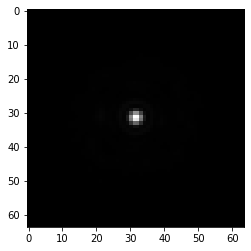

In [5]:
import matplotlib.pyplot as plt

camera_cientifica_pfs = simulacao.sciImgs[0]

plt.imshow(camera_cientifica_pfs, cmap='gray')

plt.show()

#### **Plotando residuos por iteração:**

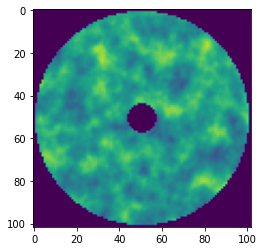

In [8]:
import matplotlib.pyplot as plt
from IPython import display

residuos = simulacao.sciPhase[0]

for residuo in residuos:
    plt.imshow(residuo, vmin=0, vmax=2000)  #(residuo, cmap='gray')
    display.display(plt.gcf())
    display.clear_output(wait=True)


#### **Abrindo imagens fits geradas pela simulação:**


###### **1. Selecionar pasta com arquivos da simulação:**



In [11]:
from IPython.display import display
import ipywidgets as Widgets
import os

pasta_da_simulação = ''

path    = f'/content/{simName}/'
subpath = [f.path for f in os.scandir(path) if f.is_dir()]
options = [string.replace(path,'') for string in subpath]

ddform  = Widgets.Dropdown(options=options,description='Simulação:')
button  = Widgets.Button(description="Confirmar", button_style='info')
output  = Widgets.Output()

display(ddform, button, output)

def on_button_clicked(b):
    with output:
        global pasta_da_simulacao
        i = options.index(ddform.value)
        pasta_da_simulacao = subpath[i]
        print("Simulação selecionada com sucesso!")

button.on_click(on_button_clicked)

Dropdown(description='Simulação:', options=('2021-01-29-17-54-10', '2021-01-29-17-48-00'), value='2021-01-29-1…

Button(button_style='info', description='Confirmar', style=ButtonStyle())

Output()

###### **2. Executar:**



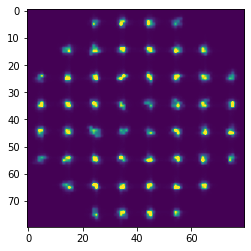

In [ ]:
import matplotlib.pyplot as plt
from astropy.io import fits
from IPython import display
from glob import glob

diretorio = f'{pasta_da_simulacao}/wfsFPFrames/*.fits'    
arquivos = glob(diretorio)
frames = []

for arquivo in arquivos:
    frames.append(fits.getdata(arquivo, ext=0))

for frame in frames:
    plt.imshow(frame, vmin=0, vmax=500)
    display.display(plt.gcf())
    display.clear_output(wait=True)

###### **Comando para apagar pasta da simulação:**

In [ ]:
!rm -rf simName